In [1]:
import os
import json
import warnings
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from collections import defaultdict
from PIL import Image

from data.dataset_maps import class_mapping

In [2]:
d = defaultdict(dict)
for c in class_mapping["names"][1:]:
    print(f"Processing: {c}")
    num_pixels = 0
    num_images = 0

    for image_path in os.listdir(f"../data/images_2021/train/labels/{c}/"):
        img = np.array(Image.open(f"../data/images_2021/train/labels/{c}/{image_path}"))
        pixels_255 = np.sum(img == 255)
        num_pixels += pixels_255
        if pixels_255 > 0:
            num_images += 1

    d[c]["num_pixels"] = num_pixels
    d[c]["num_images"] = num_images


Processing: double_plant
Processing: drydown
Processing: endrow
Processing: nutrient_deficiency
Processing: planter_skip
Processing: water
Processing: waterway
Processing: weed_cluster


In [21]:
d

defaultdict(dict,
            {'double_plant': {'num_pixels': 126330289, 'num_images': 6234},
             'drydown': {'num_pixels': 1838660590, 'num_images': 16806},
             'endrow': {'num_pixels': 135527899, 'num_images': 4481},
             'nutrient_deficiency': {'num_pixels': 1108061290,
              'num_images': 13308},
             'planter_skip': {'num_pixels': 28304311, 'num_images': 2599},
             'water': {'num_pixels': 149637355, 'num_images': 2155},
             'waterway': {'num_pixels': 141159490, 'num_images': 3899},
             'weed_cluster': {'num_pixels': 921419728, 'num_images': 11111},
             'double plant': {}})

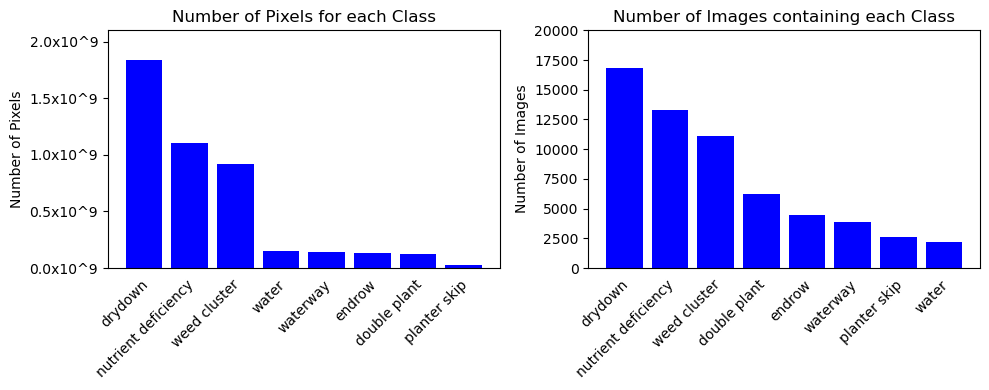

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming you have already populated the dictionary d

# Extracting data for plotting
c_values = list(d.keys())
num_pixels_values = [d[c]["num_pixels"] for c in c_values]
num_images_values = [d[c]["num_images"] for c in c_values]

# Sorting the values and keys based on num_pixels_values
sorted_values, sorted_keys = zip(*sorted(zip(num_pixels_values, c_values), reverse=True))

# Plotting the bar chart for num_pixels
plt.figure(figsize=(10, 4))

# Subplot 1: Number of Pixels
plt.subplot(1, 2, 1)
plt.bar([i.replace("_", " ") for i in sorted_keys], sorted_values, color='blue')
# plt.xlabel('c')
plt.ylabel('Number of Pixels')
plt.title('Number of Pixels for each Class')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}x10^9'))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=0.5e9))
plt.ylim([0, 2.1*1e9])
plt.gca().set_xticks([i + 0.15 for i in range(len(sorted_keys))])
plt.gca().tick_params(axis='x', which='both', bottom=False)

# Sorting the values and keys based on num_images_values
sorted_values, sorted_keys = zip(*sorted(zip(num_images_values, c_values), reverse=True))

# Subplot 2: Number of Images
plt.subplot(1, 2, 2)
plt.bar([i.replace("_", " ") for i in sorted_keys], sorted_values, color='blue')
# plt.xlabel('c')
plt.ylabel('Number of Images')
plt.title('Number of Images containing each Class')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 20000])
plt.gca().set_xticks([i + 0.15 for i in range(len(sorted_keys))])
plt.gca().tick_params(axis='x', which='both', bottom=False)

# Adjust layout
plt.tight_layout()
plt.savefig("class_imbalance.jpg")